In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

In [2]:
fdata = pd.read_csv("fuji_per_healpix-vs-sdss-results.csv")
fdata

,targetid,ra_1,dec_1,ppxf_sigma,ppxf_sigma_error,DER_SNR,snr_ppxf,objid_2,ra_2,dec_2,h_alpha_eqw,sigmaStars,sigmaStarsErr,veldisp,veldispErr
0,39628417112478213,192.260477,26.893112,138.971914,1.383833,50.328238,37.098634,1237667322722975777,192.260475,26.893130,-0.276066,131.19620,2.446620,123.31250,2.796156
1,39627769709071900,184.913600,-0.750861,149.062907,1.541831,55.533676,33.891261,1237654669214023822,184.913612,-0.750832,-0.251797,133.23210,3.595464,129.34720,3.885587
2,39628422523128777,193.922076,27.250763,270.979718,1.667840,76.538311,31.694018,1237667323260502019,193.922068,27.250765,-0.256416,249.99830,3.095356,251.30850,3.608889
3,39628438608283113,194.221420,27.929491,201.428815,1.704093,59.108758,30.380667,1237667444048396324,194.221408,27.929497,-0.283523,203.63750,3.266631,186.16700,3.728426
4,39632940354767051,155.787603,32.907518,189.826232,2.438502,39.998815,29.214919,1237664877807730696,155.787606,32.907530,-0.302244,198.60010,4.244899,180.25100,4.895857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4216,39633149717645372,246.293085,43.878614,98.764083,26.679481,2.524427,0.827875,1237655349431763143,246.293071,43.878616,-3.075022,109.83120,12.361460,110.71750,12.234250
4217,39627818572713944,217.429927,1.262170,58.403387,27.061392,2.136285,0.824143,1237651735236444413,217.429960,1.262166,-5.329380,75.07372,12.944650,77.86646,14.670870
4218,39633355574084016,179.132846,57.417037,99.830487,39.122503,2.054152,0.783272,1237661353242787960,179.132864,57.417040,-2.267196,177.63310,18.524540,163.74730,22.613850
4219,39633307725466372,173.525018,53.919783,144.551081,53.371950,1.202601,0.564747,1237657589783593038,173.524967,53.919728,-23.996330,146.27330,17.888650,151.14700,20.890950


In [3]:
ppxf_sigma = fdata.ppxf_sigma
ppxf_sigma_error = fdata.ppxf_sigma_error
sigmaStars = fdata.sigmaStars
sigmaStarsErr = fdata.sigmaStarsErr
veldisp = fdata.veldisp
veldispErr = fdata.veldispErr
pull_pipe_1 = (ppxf_sigma - veldisp)/(np.sqrt((ppxf_sigma_error*ppxf_sigma_error)+(veldispErr*veldispErr)))
pull_pipe_2 = (ppxf_sigma - sigmaStars)/(np.sqrt((ppxf_sigma_error*ppxf_sigma_error)+(sigmaStarsErr*sigmaStarsErr)))

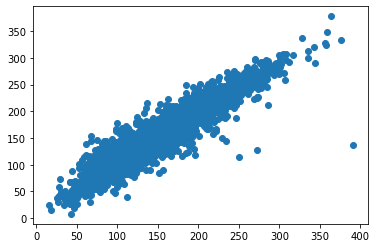

In [4]:
plt.scatter(ppxf_sigma,sigmaStars)
plt.show()

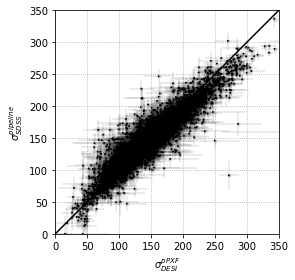

In [5]:
fig, ax = plt.subplots()
ax.set_ylim(0.0,350.0)
ax.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax.errorbar(ppxf_sigma,veldisp,xerr=ppxf_sigma_error,yerr=veldispErr,fmt=".k",alpha=0.1)
ax.scatter(ppxf_sigma,veldisp,color='black',edgecolor='none',s=3.5)
ax.plot(xxx,yyy,color="black")
ax.set_aspect(1)
ax.set_xlabel(r'$\sigma_{DESI}^{pPXF}$')
ax.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
#plt.savefig('sigma_desi_sigmastars.png')
plt.show()

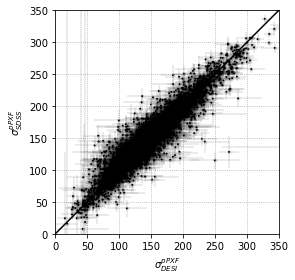

In [6]:
fig, ax = plt.subplots()
ax.set_ylim(0.0,350.0)
ax.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax.errorbar(ppxf_sigma,sigmaStars,xerr=ppxf_sigma_error,yerr=sigmaStarsErr,fmt=".k",alpha=0.1)
ax.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax.plot(xxx,yyy,color="black")
ax.set_aspect(1)
ax.set_xlabel(r'$\sigma_{DESI}^{pPXF}$')
ax.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
#plt.legend()#,frameon=False)
plt.tight_layout()
#plt.savefig('sigma_desi_sigmastars.png')
plt.show()

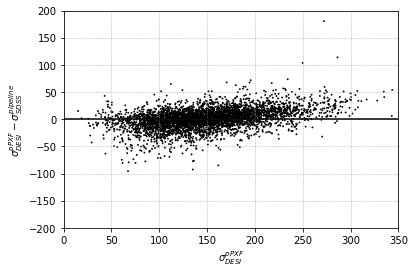

In [7]:
plt.ylim(-200,200)
plt.xlim(0.0,350.0)
plt.scatter(ppxf_sigma,ppxf_sigma-veldisp,color='black',edgecolor='none',s=3.5)
plt.axhline(y=0.0,color="black")
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\sigma_{DESI}^{pPXF}$')
plt.ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$')
#plt.savefig('sigma_P_minus_S.png')
plt.show()

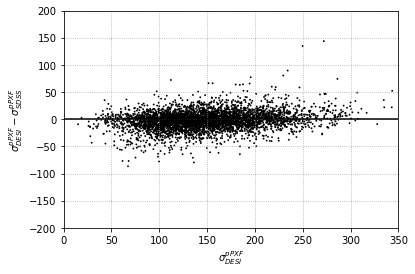

In [8]:
plt.ylim(-200,200)
plt.xlim(0.0,350.0)
plt.scatter(ppxf_sigma,ppxf_sigma-sigmaStars,color='black',edgecolor='none',s=3.5)
plt.axhline(y=0.0,color="black")
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\sigma_{DESI}^{pPXF}$')
plt.ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}$')
#plt.savefig('sigma_P_minus_S.png')
plt.show()

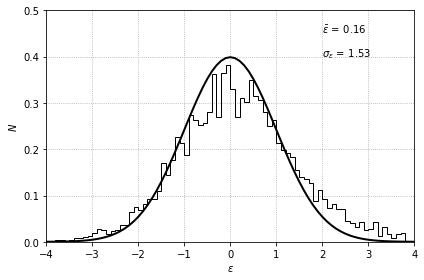

In [9]:
plt.ylim(0.0,0.5)
plt.xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe_1,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = plt.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$N$')
plt.text(2.0,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1))+'$')#, fontname = 'Times New Roman',size=20)
plt.text(2.0,0.4,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1))+'$')#, fontname = 'Times New Roman',size=20)
#plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('pull-distribution_internal.pdf')
#plt.savefig('pull-distribution_internal.png')
plt.show()

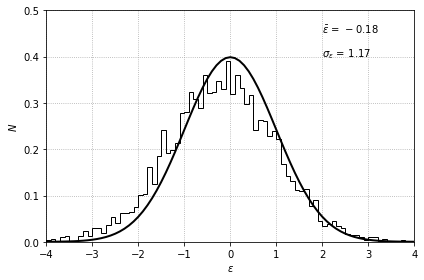

In [10]:
plt.ylim(0.0,0.5)
plt.xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = plt.hist(pull_pipe_2,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = plt.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
plt.grid(b=True, which='both', color='0.65',linestyle=':')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$N$')
plt.text(2.0,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2))+'$')#, fontname = 'Times New Roman',size=20)
plt.text(2.0,0.4,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2))+'$')#, fontname = 'Times New Roman',size=20)
#plt.legend(fontsize=16)
plt.tight_layout()
#plt.savefig('pull-distribution_internal.pdf')
#plt.savefig('pull-distribution_internal.png')
plt.show()

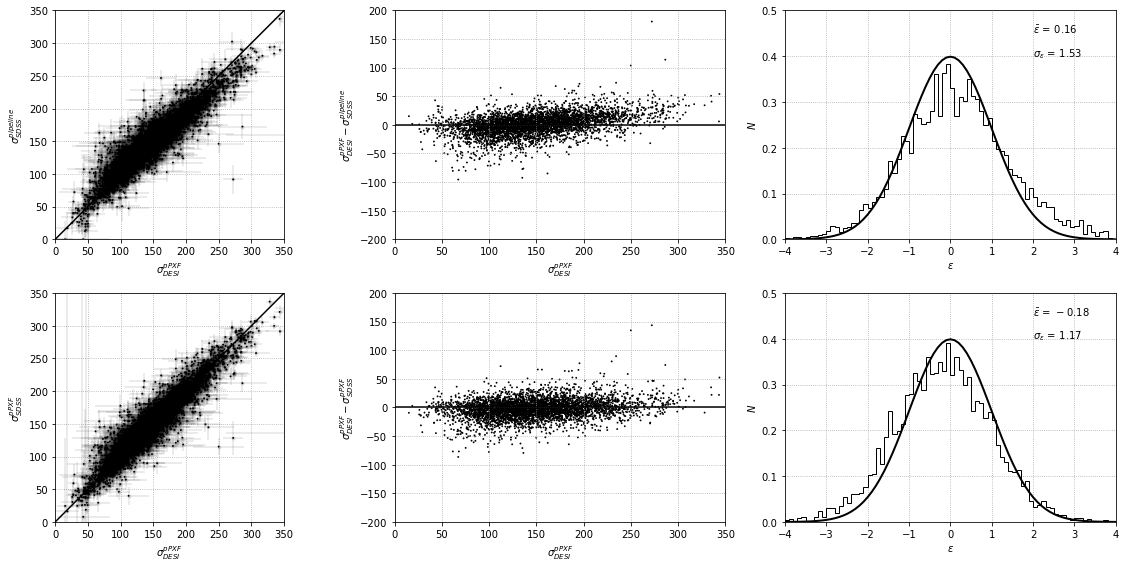

In [16]:
f_1, ((ax1, ax2, ax3),(ax4, ax5, ax6)) = plt.subplots(nrows=2,ncols=3, figsize=(16, 8),sharex=False, sharey=False)
ax1.set_ylim(0.0,350.0)
ax1.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax1.errorbar(ppxf_sigma,veldisp,xerr=ppxf_sigma_error,yerr=veldispErr,fmt=".k",alpha=0.1)
ax1.scatter(ppxf_sigma,veldisp,color='black',edgecolor='none',s=3.5)
ax1.plot(xxx,yyy,color="black")
ax1.set_aspect(1)
ax1.set_xlabel(r'$\sigma_{DESI}^{pPXF}$')
ax1.set_ylabel(r'$\sigma_{SDSS}^{pipeline}$')
ax1.grid(b=True, which='both', color='0.65',linestyle=':')

ax4.set_ylim(0.0,350.0)
ax4.set_xlim(0.0,350.0)
xxx=[0,350];yyy=[0,350]
ax4.errorbar(ppxf_sigma,sigmaStars,xerr=ppxf_sigma_error,yerr=sigmaStarsErr,fmt=".k",alpha=0.1)
ax4.scatter(ppxf_sigma,sigmaStars,color='black',edgecolor='none',s=3.5)
ax4.plot(xxx,yyy,color="black")
ax4.set_aspect(1)
ax4.set_xlabel(r'$\sigma_{DESI}^{pPXF}$')
ax4.set_ylabel(r'$\sigma_{SDSS}^{pPXF}$')
ax4.grid(b=True, which='both', color='0.65',linestyle=':')

ax2.set_ylim(-200,200)
ax2.set_xlim(0.0,350.0)
ax2.scatter(ppxf_sigma,ppxf_sigma-veldisp,color='black',edgecolor='none',s=3.5)
ax2.axhline(y=0.0,color="black")
ax2.grid(b=True, which='both', color='0.65',linestyle=':')
ax2.set_xlabel(r'$\sigma_{DESI}^{pPXF}$')
ax2.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pipeline}$')

ax5.set_ylim(-200,200)
ax5.set_xlim(0.0,350.0)
ax5.scatter(ppxf_sigma,ppxf_sigma-sigmaStars,color='black',edgecolor='none',s=3.5)
ax5.axhline(y=0.0,color="black")
ax5.grid(b=True, which='both', color='0.65',linestyle=':')
ax5.set_xlabel(r'$\sigma_{DESI}^{pPXF}$')
ax5.set_ylabel(r'$\sigma_{DESI}^{pPXF} - \sigma_{SDSS}^{pPXF}$')

ax3.set_ylim(0.0,0.5)
ax3.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax3.hist(pull_pipe_1,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax3.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax3.grid(b=True, which='both', color='0.65',linestyle=':')
ax3.set_xlabel(r'$\epsilon$')
ax3.set_ylabel(r'$N$')
ax3.text(2.0,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_1))+'$')#, fontname = 'Times New Roman',size=20)
ax3.text(2.0,0.4,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_1))+'$')#, fontname = 'Times New Roman',size=20)

ax6.set_ylim(0.0,0.5)
ax6.set_xlim(-4.0,4.0)
events_prop, edges_prop, patches_prop = ax6.hist(pull_pipe_2,bins=np.arange(-5.0,5.0,0.1),density=1,histtype='step',color='black',label='sigmastar_lamost vs. veldisp_sdss')#,label='Normalized uncorrected $P(r)$')#
y = norm.pdf(edges_prop, 0.0, 1.0)
l = ax6.plot(edges_prop, y, 'k', linewidth=2,label='Gaussian with mean 0 and $\sigma$ 1')#,label='Gaussian fit to the uncorrected $P(r)$')
#plt.hist(pull_pipe,bins=arange(-5.0,5.0,0.1),color='black')
ax6.grid(b=True, which='both', color='0.65',linestyle=':')
ax6.set_xlabel(r'$\epsilon$')
ax6.set_ylabel(r'$N$')
ax6.text(2.0,0.45,r'$\bar{\epsilon}\/=\/'+'{0:.2f}'.format(np.mean(pull_pipe_2))+'$')#, fontname = 'Times New Roman',size=20)
ax6.text(2.0,0.4,r'$\sigma_{\epsilon}\/=\/'+'{0:.2f}'.format(np.std(pull_pipe_2))+'$')#, fontname = 'Times New Roman',size=20)


plt.tight_layout()
plt.savefig('external_consistency.png')
plt.show()